In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_blobs

# Introduction

## Cluster plots

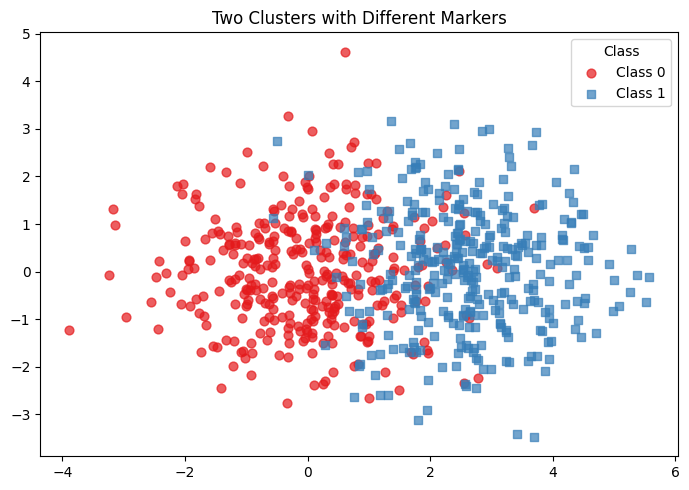

In [2]:
palette = sns.color_palette('Set1', n_colors=5)
def plot_clusters(n_samples=1000, centers=3, cluster_std=1.2, markers={0: 'o', 1: 's'}, colors=None, title='Clusters'):
    # Generate data
    X, y = make_blobs(
        n_samples=n_samples, 
        centers=centers,
        cluster_std=cluster_std, 
        random_state=42
    )
    df = pd.DataFrame(X, columns=['feature1', 'feature2'])
    df['label'] = y

    plt.figure(figsize=(7, 5))
    markers = markers
    # Use provided colors or default palette
    if colors is None:
        palette = sns.color_palette('Set1', n_colors=len(np.unique(y)))
        colors = {label: palette[label] for label in np.unique(y)}
    else:
        # If colors is a list, convert to dict
        if isinstance(colors, list):
            colors = {label: colors[label] for label in np.unique(y)}
    for label in np.unique(y):
        subset = df[df['label'] == label]
        plt.scatter(
            subset['feature1'], subset['feature2'],
            marker=markers.get(label, 'o'),
            color=colors.get(label, 'gray'),
            alpha=0.7, s=40, label=f'Class {label}'
        )
    plt.xlabel('')
    plt.ylabel('')
    plt.title(title)
    plt.legend(title='Class')
    plt.tight_layout()
    plt.show()

plot_clusters(
    n_samples=700,
    centers=[(0,0), (2.5,0)],
    colors=[palette[0], palette[1]],  # Pass the palette directly
    markers={0: 'o', 1: 's'},
    title='Two Clusters with Different Markers'
)

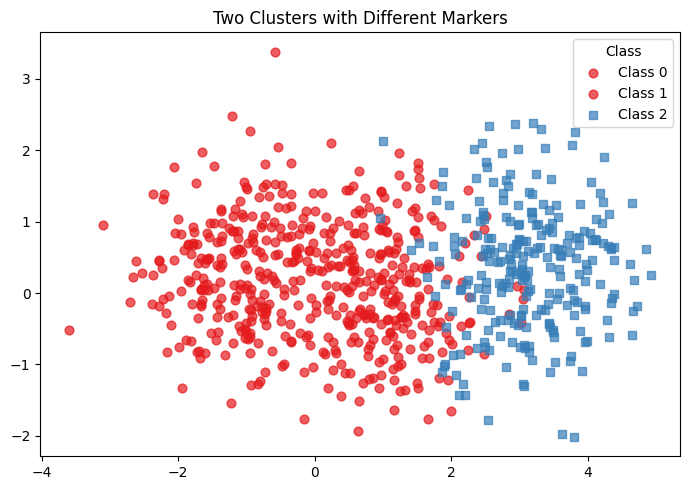

In [3]:
plot_clusters(
    n_samples=750,
    centers=[(-1,0.3), (1,0), (3,0.3)],
    cluster_std=0.8,
    colors=[palette[0], palette[0], palette[1]],  # Pass the palette directly
    markers={0: 'o', 1: 'o', 2: 's'},
    title='Two Clusters with Different Markers'
)

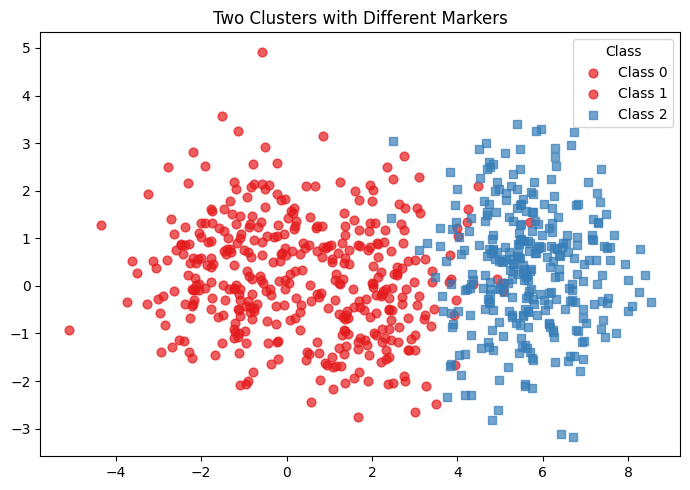

In [4]:
plot_clusters(
    n_samples=[200,200,300],
    centers=[(-1.2,0.3), (2,0), (5.5,0.3)],
    cluster_std=1.2,
    colors=[palette[0], palette[0], palette[1]],  # Pass the palette directly
    markers={0: 'o', 1: 'o', 2: 's'},
    title='Two Clusters with Different Markers'
)

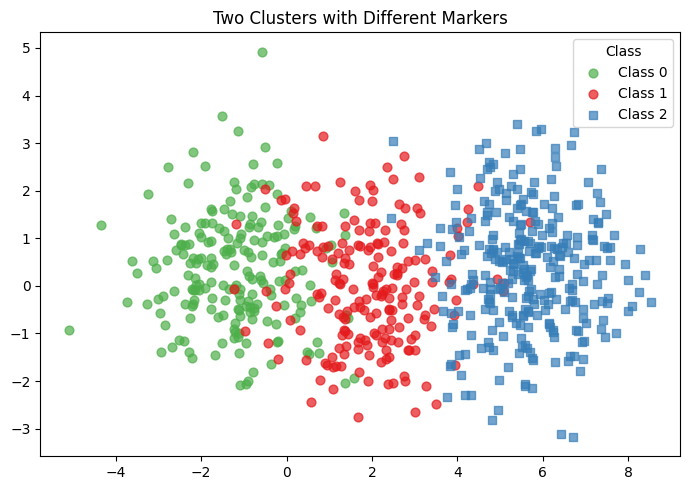

In [5]:
plot_clusters(
    n_samples=[200,200,300],
    centers=[(-1.2,0.3), (2,0), (5.5,0.3)],
    cluster_std=1.2,
    colors=[palette[2], palette[0], palette[1]],  # Pass the palette directly
    markers={0: 'o', 1: 'o', 2: 's'},
    title='Two Clusters with Different Markers'
)

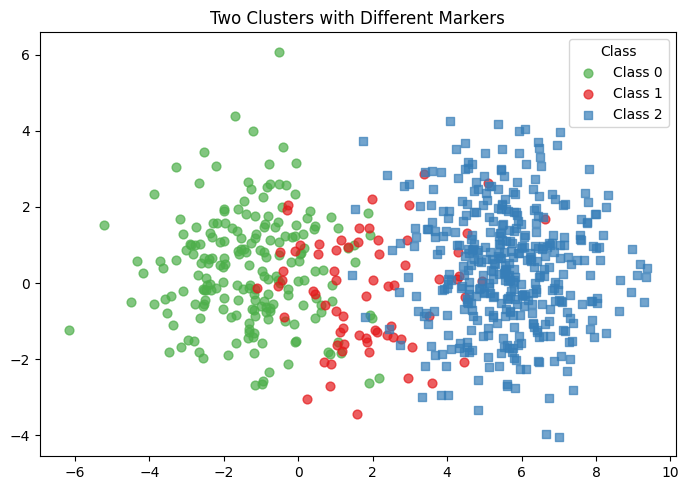

In [6]:
plot_clusters(
    n_samples=[200,70,400],
    centers=[(-1.3,0.3), (2,0), (5.5,0.3)],
    cluster_std=1.5,
    colors=[palette[2], palette[0], palette[1]],  # Pass the palette directly
    markers={0: 'o', 1: 'o', 2: 's'},
    title='Two Clusters with Different Markers'
)

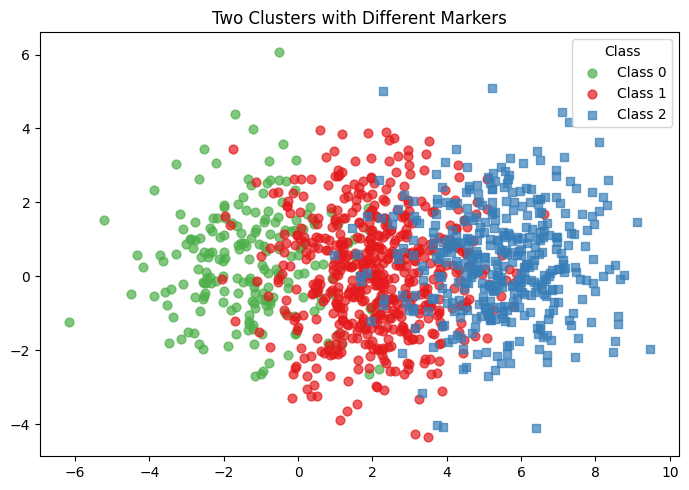

In [7]:
plot_clusters(
    n_samples=[200,550,400],
    centers=[(-1.3,0.3), (2,0), (5.5,0.3)],
    cluster_std=1.5,
    colors=[palette[2], palette[0], palette[1]],  # Pass the palette directly
    markers={0: 'o', 1: 'o', 2: 's'},
    title='Two Clusters with Different Markers'
)

## Score density plots

In [8]:
def MoSS(n, alpha, m):
    p_score = np.random.uniform(size=int(n * alpha)) ** m
    n_score = 1 - (np.random.uniform(size=int(round(n * (1 - alpha), 0))) ** m)
    scores = np.column_stack((np.concatenate((p_score, n_score)), np.concatenate((np.ones(len(p_score)), np.full(len(n_score), 0)))))
    # pdb.set_trace()
    return scores

MoSS(1000, 0.5, 0.3)

array([[0.92145754, 1.        ],
       [0.77770623, 1.        ],
       [0.74763806, 1.        ],
       ...,
       [0.06300392, 0.        ],
       [0.43067638, 0.        ],
       [0.0656013 , 0.        ]], shape=(1000, 2))

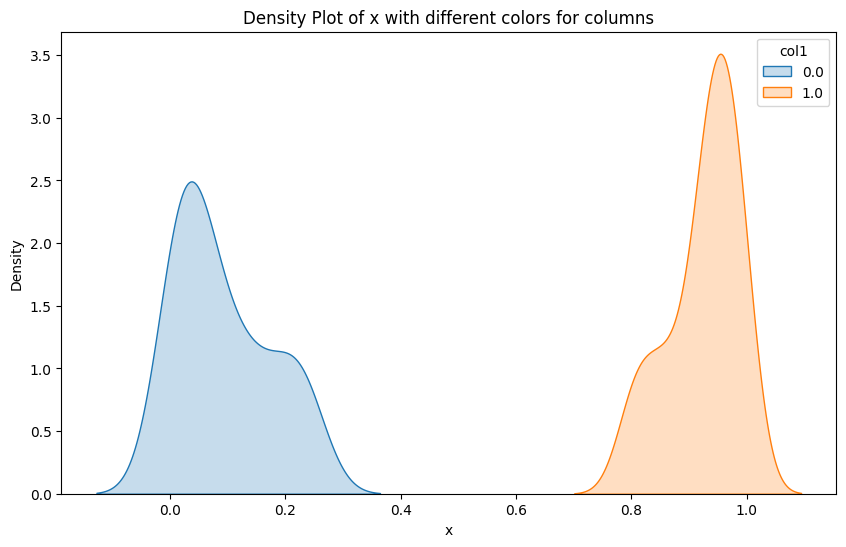

In [9]:
x=MoSS(50, 0.5, 0.1)
x = pd.DataFrame(x)
x.columns = ['x', 'col1']

def plot_density(x):
    # Create the density plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=x, x='x', hue='col1', fill=True)

    plt.title('Density Plot of x with different colors for columns')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.show()

plot_density(x)


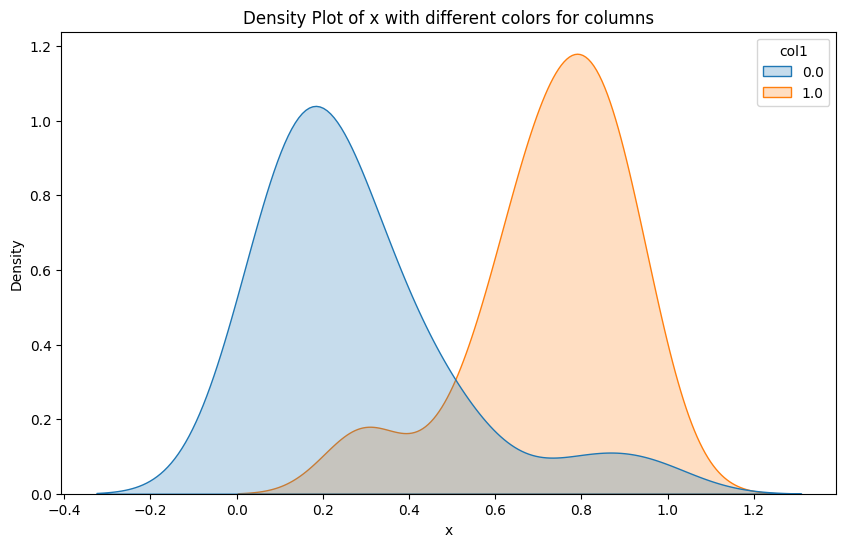

In [10]:
x=MoSS(50, 0.5, 0.4)
x = pd.DataFrame(x)
x.columns = ['x', 'col1']

plot_density(x)

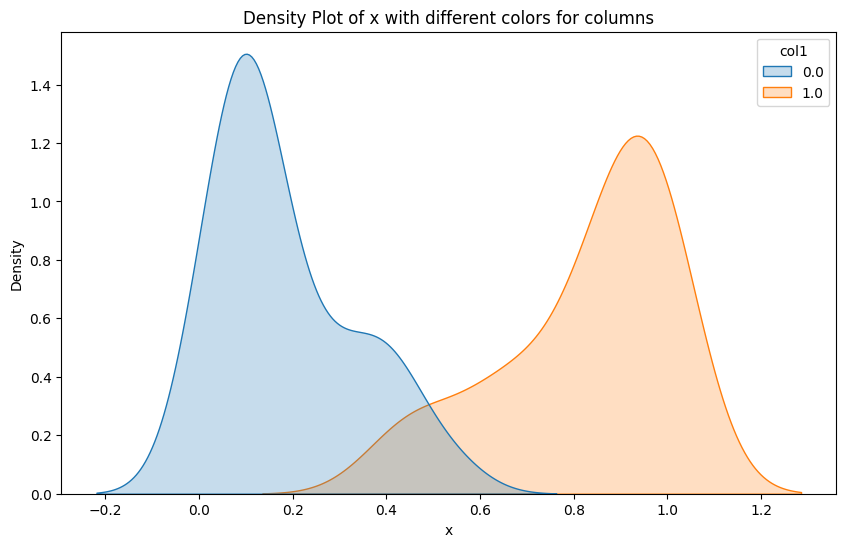

In [11]:
x=MoSS(50, 0.5, 0.2)
x = pd.DataFrame(x)
x.columns = ['x', 'col1']

def plot_density(x):
    # Create the density plot
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=x, x='x', hue='col1', fill=True)

    plt.title('Density Plot of x with different colors for columns')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.show()

plot_density(x)


# Results

In [12]:
results_path = './results/'

## Synthetic

In [13]:
df_syn = pd.read_csv(results_path + 'results_syn.csv')
df_syn

,MFtr,MFte,R_1,P_1,AE,Distance,Qnt
0,0.05,0.05,0.0,0.00,0.00,NaN,CC
1,0.05,0.05,0.0,0.00,0.00,NaN,ACC
2,0.05,0.05,0.0,0.00,0.00,topsoe,ACCSyn-TS
3,0.05,0.05,0.0,0.00,0.00,NaN,T50
4,0.05,0.05,0.0,0.00,0.00,topsoe,T50Syn-TS
...,...,...,...,...,...,...,...
8021415,0.95,0.95,1.0,0.56,0.44,topsoe,DySyn-TS
8021416,0.95,0.95,1.0,0.00,1.00,NaN,SMM
8021417,0.95,0.95,1.0,0.90,0.10,topsoe,SMMSyn-TS
8021418,0.95,0.95,1.0,1.00,0.00,NaN,HDy


['ACC', 'ACCQuaDapt', 'X', 'XQuaDapt', 'CC', 'MAX', 'MAXQuaDapt', 'MS', 'MSQuaDapt', 'T50', 'T50QuaDapt', 'DyS', 'DySQuaDapt', 'HDy', 'HDyQuaDapt', 'SMM', 'SMMQuaDapt']


C:\Users\João Pedro\AppData\Local\Temp\ipykernel_34632\3942641080.py:39: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  classic_palette = matplotlib.cm.get_cmap('Reds', n_methods + 2)
C:\Users\João Pedro\AppData\Local\Temp\ipykernel_34632\3942641080.py:40: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  syn_palette = matplotlib.cm.get_cmap('Greens', n_methods + 2)


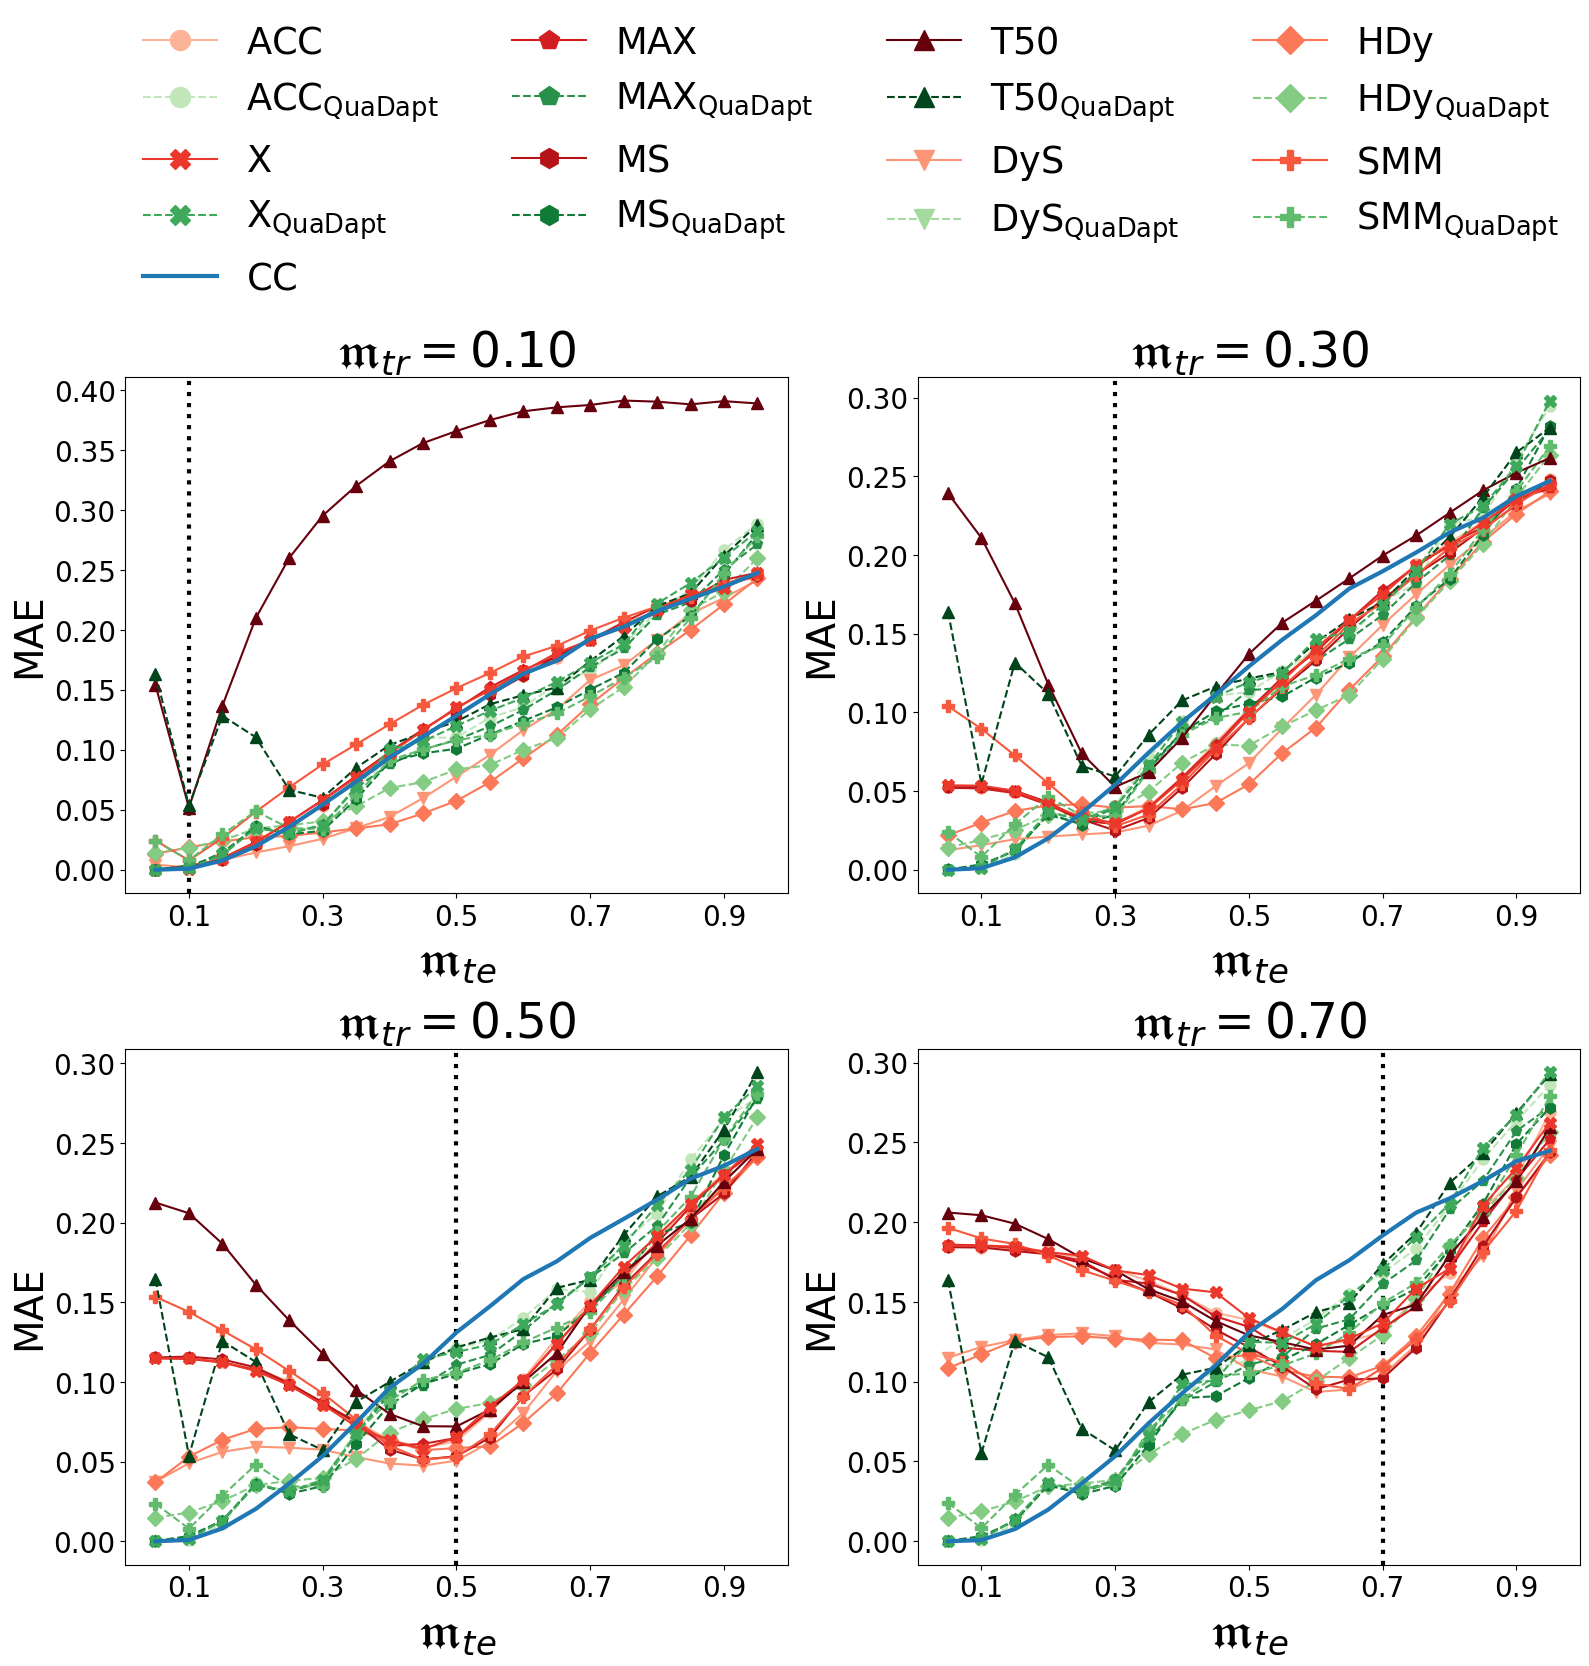

In [14]:
mftr_values = [0.10, 0.30, 0.50, 0.70]
grouped = df_syn.groupby(['Qnt', 'MFte', 'MFtr']).agg({'AE': 'mean'}).reset_index()

proposal = 'QuaDapt'
grouped['Qnt'] = grouped['Qnt'].apply(lambda x: x.replace('Syn', proposal) if 'Syn' in x else x)
grouped['Qnt'] = grouped['Qnt'].str.replace('-TS', '', regex=False)

thr_qnt = ['ACC', 'ACCSyn-TS', 'X', 'XSyn-TS', 'CC', 'MAX', 'MAXSyn-TS', 'MS', 'MSSyn-TS', 'T50', 'T50Syn-TS']
distr_qnt = ['DyS-TS', 'DySyn-TS', 'HDy', 'HDySyn', 'SMM', 'SMMSyn-TS']
qnt = thr_qnt + distr_qnt

qnt_quadapt = [q.replace('Syn', proposal) if q != 'DySyn-TS' else 'DySQuaDapt-TS' for q in qnt]
qnt = qnt_quadapt
qnt = [q.replace('-TS', '') for q in qnt]

print(qnt)

method_pairs = [
    ('CC', 'CCQuaDapt'),
    ('ACC', 'ACCQuaDapt'),
    ('DyS', 'DySQuaDapt'),
    ('HDy', 'HDyQuaDapt'),
    ('SMM', 'SMMQuaDapt'),
    ('X', 'XQuaDapt'),
    ('MAX', 'MAXQuaDapt'),
    ('MS', 'MSQuaDapt'),
    ('PACC', 'PACCQuaDapt'),
    ('T50', 'T50QuaDapt'),
]

def format_label(name):
    if name.endswith('QuaDapt'):
        base = name.replace('QuaDapt', '')
        return fr"$\mathrm{{{base}}}_{{\mathrm{{QuaDapt}}}}$"
    else:
        return fr"$\mathrm{{{name}}}$"

n_methods = len(method_pairs)
classic_palette = matplotlib.cm.get_cmap('Reds', n_methods + 2)
syn_palette = matplotlib.cm.get_cmap('Greens', n_methods + 2)

# Assign a unique marker for each pair (example: cycle through a list or define your own)
pair_markers = ['', 'o', 'v', 'D', 'P', 'X', 'p', 'h', 's', '^']  # 10 unique markers

pair_marker_map = {}
for (classic, syn), marker in zip(method_pairs, pair_markers):
    pair_marker_map[classic] = marker
    pair_marker_map[syn] = marker

# Assign a unique color to each method in the pair
custom_color_map = {}
for idx, (classic_method, syn_method) in enumerate(method_pairs):
    if classic_method == 'CC':
        custom_color_map[classic_method] = 'tab:blue'
    else:
        custom_color_map[classic_method] = classic_palette(idx + 2)
    custom_color_map[syn_method] = syn_palette(idx + 2)

# Prepare handles and labels for the legend
lines = []
labels = []
for qnt_val in qnt:
    if proposal in qnt_val:
        line_style = '--'
    else:
        line_style = '-'
    marker_style = pair_marker_map.get(qnt_val, 'o')
    color = custom_color_map.get(qnt_val, 'tab:gray')
    if qnt_val == 'CC':
        line, = plt.plot([], [], marker=None, linestyle='-', linewidth=3, label=qnt_val, color=color)
    else:
        line, = plt.plot([], [], marker=marker_style, markersize=8, linestyle=line_style, label=qnt_val, color=color)
    lines.append(line)
    labels.append(format_label(qnt_val))
plt.close()  # Close the dummy plot

# Create the subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 14)) #(16, 12)
axes = axes.flatten()

for idx, selected_mftr in enumerate(mftr_values):
    ax = axes[idx]
    filtered_data = grouped[grouped['MFtr'] == selected_mftr]
    for qnt_val in filtered_data['Qnt'].unique():
        qnt_data = filtered_data[filtered_data['Qnt'] == qnt_val]
        if proposal in qnt_val:
            line_style = '--'
        else:
            line_style = '-'
        marker_style = pair_marker_map.get(qnt_val, 'o')
        color = custom_color_map.get(qnt_val, 'tab:gray')
        if qnt_val in qnt:
            if qnt_val == 'CC':
                ax.plot(
                    qnt_data['MFte'], qnt_data['AE'],
                    marker=None, linestyle='-',
                    linewidth=3,
                    label=qnt_val, color=color, zorder=10
                )
            else:
                ax.plot(
                    qnt_data['MFte'],
                    qnt_data['AE'],
                    marker=marker_style,
                    markersize=8,
                    linestyle=line_style,
                    label=qnt_val,
                    color=color
                )
    ax.set_title(fr'$\mathfrak{{m}}_{{tr}} = {selected_mftr:.2f}$', fontsize=35)
    ax.set_xlabel(fr'$\mathfrak{{m}}_{{te}}$', fontsize=35)
    ax.set_ylabel('MAE', fontsize=28)
    ax.axvline(selected_mftr, color='black', linestyle=':', linewidth=3, zorder=0)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.set_xticks([0.10, 0.30, 0.50, 0.70, 0.90])

# Add the legend above all subplots
fig.legend(
    handles=lines, labels=labels,
    loc='upper center', bbox_to_anchor=(0.535, 1.20),
        ncol=4, fontsize=26.5, frameon=False, markerscale=1.8,
)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

## Real

In [15]:
df_real = pd.read_csv(results_path + 'lequa2025_results_datasets.csv')
df_real.rename({'error': 'AE', 'quantifier': 'Qnt', 'harderDistr': 'H'}, axis=1, inplace=True)
df_updated = pd.read_csv(results_path + 'lequa2025_results_datasets_updated.csv')
df_updated.rename({'error': 'AE', 'quantifier': 'Qnt', 'harderDistr': 'H'}, axis=1, inplace=True)
df_real = df_real[~df_real['dataset'].isin(['Covertype', 'Walking'])]
df_real = pd.concat([df_real, df_updated], ignore_index=True)
df_real

,actual+,actual-,predict+,predict-,AE,testSize,Qnt,H,dataset
0,0.01,0.99,0.01000,0.99000,0.00,100.0,CC,0.0,Avila
1,0.01,0.99,0.00000,1.00000,0.01,100.0,HDy-LP,0.0,Avila
2,0.01,0.99,0.02000,0.98000,0.01,100.0,HDySyn,0.0,Avila
3,0.01,0.99,0.00000,1.00000,0.01,100.0,ACC,0.0,Avila
4,0.01,0.99,0.01002,0.98998,0.00,100.0,ACCSyn,0.0,Avila
...,...,...,...,...,...,...,...,...,...
1151395,1.00,NaN,NaN,NaN,0.04,NaN,T50Syn,1.0,Walking
1151396,1.00,NaN,NaN,NaN,0.00,NaN,DyS-TS,1.0,Walking
1151397,1.00,NaN,NaN,NaN,0.12,NaN,DySyn-TS,1.0,Walking
1151398,1.00,NaN,NaN,NaN,0.05,NaN,SMM,1.0,Walking


### MAE and standard deviation table

In [16]:
grouped_real = df_real.groupby(['dataset', 'Qnt']).agg({'AE': 'mean'}).reset_index()
grouped_real[grouped_real['dataset'] == 'Avila'].sort_values('AE', ascending=True)

,dataset,Qnt,AE
4,Avila,DySyn-TS,0.044251
18,Avila,XSyn,0.045988
1,Avila,ACCSyn,0.046368
6,Avila,HDySyn,0.048727
8,Avila,MAXSyn,0.050341
11,Avila,PACC,0.053943
2,Avila,CC,0.056123
17,Avila,X,0.059689
0,Avila,ACC,0.064671
3,Avila,DyS-TS,0.064840


In [17]:
# Create a summary dataframe with MAE and standard deviation
mae_std_df = df_real.groupby(['dataset', 'Qnt']).agg({
    'AE': ['mean', 'std']
}).reset_index()

# Flatten column names
mae_std_df.columns = ['dataset', 'Qnt', 'MAE', 'STD']

# Format the values with 3 decimals and combine MAE with STD in parentheses
mae_std_df['MAE_STD'] = mae_std_df.apply(
    lambda row: f"{row['MAE']:.3f} ({row['STD']:.3f})", axis=1
)

# Pivot to get quantifiers as columns
mae_std_pivot = mae_std_df.pivot(index='dataset', columns='Qnt', values='MAE_STD')

mae_std_pivot

Qnt,ACC,ACCSyn,CC,DyS-TS,DySyn-TS,HDy-LP,HDySyn,MAX,MAXSyn,MS,MSSyn,PACC,PACCSyn,SMM,SMMSyn,T50,T50Syn,X,XSyn
dataset,,,,,,,,,,,,,,,,,,,
Avila,0.065 (0.044),0.046 (0.054),0.056 (0.039),0.065 (0.047),0.044 (0.051),0.079 (0.055),0.049 (0.047),0.070 (0.061),0.050 (0.061),0.156 (0.118),0.074 (0.060),0.054 (0.040),0.100 (0.069),0.102 (0.063),0.090 (0.068),0.153 (0.110),0.094 (0.092),0.060 (0.041),0.046 (0.054)
Chess game,0.052 (0.037),0.031 (0.026),0.045 (0.033),0.035 (0.029),0.030 (0.027),0.048 (0.036),0.039 (0.031),0.046 (0.038),0.034 (0.030),0.109 (0.071),0.060 (0.049),0.049 (0.034),0.085 (0.052),0.070 (0.044),0.065 (0.048),0.127 (0.088),0.088 (0.086),0.046 (0.033),0.030 (0.027)
Covertype,0.059 (0.045),0.057 (0.055),0.077 (0.053),0.062 (0.050),0.060 (0.054),0.072 (0.057),0.059 (0.050),0.071 (0.057),0.062 (0.064),0.085 (0.063),0.096 (0.070),0.092 (0.054),0.114 (0.076),0.079 (0.058),0.091 (0.064),0.073 (0.059),0.121 (0.104),0.070 (0.054),0.056 (0.054)
Dermatology,0.002 (0.005),0.002 (0.005),0.002 (0.005),0.002 (0.005),0.010 (0.010),0.008 (0.008),0.050 (0.044),0.002 (0.005),0.002 (0.005),0.022 (0.019),0.120 (0.106),0.012 (0.009),0.014 (0.010),0.006 (0.006),0.036 (0.023),0.089 (0.067),0.211 (0.127),0.003 (0.006),0.002 (0.005)
HAR,0.026 (0.020),0.017 (0.015),0.017 (0.015),0.016 (0.013),0.013 (0.011),0.038 (0.030),0.026 (0.021),0.020 (0.014),0.017 (0.015),0.119 (0.088),0.073 (0.044),0.035 (0.022),0.063 (0.041),0.053 (0.035),0.048 (0.025),0.164 (0.102),0.144 (0.103),0.020 (0.014),0.017 (0.015)
Land-use,0.084 (0.059),0.048 (0.037),0.061 (0.041),0.065 (0.051),0.038 (0.033),0.102 (0.064),0.038 (0.033),0.085 (0.075),0.052 (0.044),0.143 (0.097),0.063 (0.052),0.085 (0.056),0.088 (0.056),0.114 (0.070),0.065 (0.053),0.160 (0.110),0.091 (0.085),0.071 (0.046),0.048 (0.037)
Mfeat,0.058 (0.039),0.042 (0.032),0.052 (0.036),0.038 (0.029),0.037 (0.027),0.039 (0.031),0.035 (0.029),0.048 (0.036),0.044 (0.033),0.064 (0.043),0.064 (0.045),0.040 (0.033),0.079 (0.049),0.051 (0.035),0.059 (0.038),0.075 (0.056),0.069 (0.055),0.058 (0.038),0.042 (0.032)
Mosquitoes,0.060 (0.042),0.045 (0.033),0.062 (0.043),0.040 (0.030),0.048 (0.033),0.055 (0.041),0.042 (0.031),0.054 (0.042),0.048 (0.036),0.097 (0.065),0.071 (0.055),0.042 (0.034),0.088 (0.054),0.070 (0.046),0.067 (0.044),0.111 (0.081),0.106 (0.086),0.055 (0.039),0.045 (0.033)
Nursery,0.027 (0.020),0.027 (0.025),0.022 (0.018),0.020 (0.018),0.027 (0.023),0.031 (0.024),0.050 (0.036),0.025 (0.018),0.028 (0.027),0.084 (0.054),0.074 (0.058),0.062 (0.038),0.067 (0.041),0.051 (0.032),0.049 (0.036),0.120 (0.082),0.161 (0.136),0.026 (0.018),0.027 (0.025)


### Histogram victories

In [18]:
# For each dataset, count how many times ACCSyn AE is less than ACC AE in df_real
def victories_count_df(df_real):
    mae = df_real.groupby(['dataset', 'Qnt']).agg({'AE': 'mean'}).reset_index()
    datasets = mae['dataset'].unique()
    # Only select quantifiers that are Syn variants (ending with 'Syn' or 'Syn-TS')
    syn_qnts = [q for q in mae['Qnt'].unique() if q.endswith('Syn') or q.endswith('Syn-TS')]
    counts_dict = {}
    print(syn_qnts)

    for syn_qnt in syn_qnts:
        if syn_qnt == 'DySyn-TS':
            qnt = 'DyS-TS'
        elif syn_qnt == 'HDySyn':
            qnt = 'HDy-LP'
        else:
            qnt = syn_qnt.replace('Syn', '')

        counts = []
        for dataset in datasets:
            df_subset = mae[mae['dataset'] == dataset]
            syn_ae = df_subset[df_subset['Qnt'] == syn_qnt]['AE'].values
            qnt_ae = df_subset[df_subset['Qnt'] == qnt]['AE'].values
            # If both exist, compare, else set np.nan
            if len(syn_ae) > 0 and len(qnt_ae) > 0:
                count = int(syn_ae[0] < qnt_ae[0])
            else:
                count = np.nan
            counts.append(count)
        counts_dict[syn_qnt] = counts

    return pd.DataFrame(counts_dict, index=datasets)

victories_df = victories_count_df(df_real)
victories_df

['ACCSyn', 'DySyn-TS', 'HDySyn', 'MAXSyn', 'MSSyn', 'PACCSyn', 'SMMSyn', 'T50Syn', 'XSyn']


,ACCSyn,DySyn-TS,HDySyn,MAXSyn,MSSyn,PACCSyn,SMMSyn,T50Syn,XSyn
Avila,1,1,1,1,1,0,1,1,1
Chess game,1,1,1,1,1,0,1,1,1
Covertype,1,1,1,1,0,0,0,0,1
Dermatology,0,0,0,0,0,0,0,0,1
HAR,1,1,1,1,1,0,1,1,1
Land-use,1,1,1,1,1,0,1,1,1
Mfeat,1,1,1,1,0,0,0,1,1
Mosquitoes,1,0,1,1,1,0,1,1,1
Nursery,0,0,0,0,1,0,1,0,0
Phishing URL,1,1,0,0,1,0,1,0,1


In [19]:
# For each Syn column, create a non-Syn column with inverted values
for col in victories_df.columns:
    
    if col == 'DySyn-TS':
        nonsyn_col = 'DyS-TS'
    elif col == 'HDySyn':
        nonsyn_col = 'HDy-LP'
    else:
        nonsyn_col = col.replace('Syn', '')
    
    victories_df[nonsyn_col] = 1 - victories_df[col]

victories_df

,ACCSyn,DySyn-TS,HDySyn,MAXSyn,MSSyn,PACCSyn,SMMSyn,T50Syn,XSyn,ACC,DyS-TS,HDy-LP,MAX,MS,PACC,SMM,T50,X
Avila,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0
Chess game,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0
Covertype,1,1,1,1,0,0,0,0,1,0,0,0,0,1,1,1,1,0
Dermatology,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,0
HAR,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0
Land-use,1,1,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0
Mfeat,1,1,1,1,0,0,0,1,1,0,0,0,0,1,1,1,0,0
Mosquitoes,1,0,1,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0
Nursery,0,0,0,0,1,0,1,0,0,1,1,1,1,0,1,0,1,1
Phishing URL,1,1,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0


In [20]:
victories_df_sum = victories_df.sum(axis=0).to_frame().T
victories_df_sum

,ACCSyn,DySyn-TS,HDySyn,MAXSyn,MSSyn,PACCSyn,SMMSyn,T50Syn,XSyn,ACC,DyS-TS,HDy-LP,MAX,MS,PACC,SMM,T50,X
0,9,8,9,9,9,1,8,8,10,3,4,3,3,3,11,4,4,2


['ACC', 'DyS-TS', 'HDy-LP', 'MAX', 'MS', 'PACC', 'SMM', 'T50', 'X']
[np.int64(9), np.int64(8), np.int64(9), np.int64(9), np.int64(9), np.int64(1), np.int64(8), np.int64(8), np.int64(10)]
[np.int64(3), np.int64(4), np.int64(3), np.int64(3), np.int64(3), np.int64(11), np.int64(4), np.int64(4), np.int64(2)]


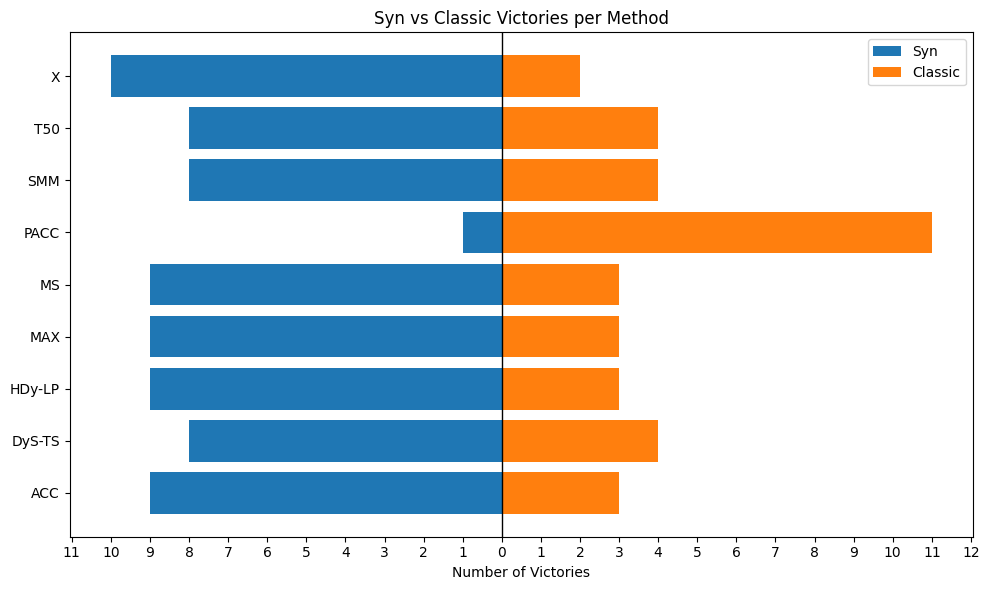

In [21]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, MultipleLocator

# Get method names (without 'Syn'), as a flat list
methods = list(victories_df_sum.columns[9:18])

# Syn and Classic victories
syn_victories = [victories_df_sum[col].values[0] for col in victories_df_sum.columns[:9]]
classic_victories = [victories_df_sum[col].values[0] for col in victories_df_sum.columns[9:18]]
print(methods)
print(syn_victories)
print(classic_victories)

fig, ax = plt.subplots(figsize=(10, 6))
ax.xaxis.set_major_locator(MultipleLocator(1))

def abs_tick(x, pos):
    return str(int(abs(x)))

ax.xaxis.set_major_formatter(FuncFormatter(abs_tick))

y = range(len(methods))

# Plot Syn victories (left, negative direction)
ax.barh(y, [-v for v in syn_victories], color='tab:blue', label='Syn', align='center')
# Plot Classic victories (right, positive direction)
ax.barh(y, classic_victories, color='tab:orange', label='Classic', align='center')

# Draw vertical line in the middle
ax.axvline(0, color='black', linewidth=1)

# Method names as y-ticks
ax.set_yticks(y)
ax.set_yticklabels(methods)

ax.set_xlabel('Number of Victories')
ax.set_title('Syn vs Classic Victories per Method')
ax.legend(loc='upper right')
plt.tight_layout()
plt.show()

### Statistical analysis

In [22]:
def ae_dataset(df, dataset):
    df = df[df['dataset'] == dataset]
    result = pd.DataFrame(columns=df['Qnt'].unique())

    for qnt in df['Qnt'].unique():
        qnt_data = df[df['Qnt'] == qnt]['AE'].values
        result[qnt] = qnt_data

    return result

In [23]:
ae_datasets = []
for dataset in df_real['dataset'].unique():
    result = ae_dataset(df_real, dataset)
    ae_datasets.append({'dataset': dataset, 'data': result})

In [24]:
len(ae_datasets)

12

In [25]:
avila = ae_datasets[0]['data']
avila

,CC,HDy-LP,HDySyn,ACC,ACCSyn,X,XSyn,MAX,MAXSyn,MS,MSSyn,PACC,PACCSyn,T50,T50Syn,DyS-TS,DySyn-TS,SMM,SMMSyn
0,0.00,0.01,0.01,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.01
1,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01
2,0.01,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.02,0.01,0.01,0.01,0.01,0.01,0.01
3,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.01,0.01
4,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5045,0.06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.02,0.00,0.00,0.00,0.00
5046,0.15,0.00,0.01,0.00,0.07,0.00,0.06,0.00,0.10,0.00,0.02,0.04,0.05,0.00,0.07,0.00,0.03,0.00,0.05
5047,0.15,0.00,0.01,0.00,0.07,0.00,0.08,0.00,0.09,0.00,0.01,0.02,0.18,0.00,0.00,0.00,0.02,0.00,0.01
5048,0.07,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,0.00,0.00,0.01


In [26]:
# still needs to check if it is a normal distribution with Shapiro-Wilk test

from scipy.stats import ttest_rel

paired_columns = [
    ['ACC', 'ACCSyn'],
    ['X', 'XSyn'],
    ['MAX', 'MAXSyn'],
    ['T50', 'T50Syn'],
    ['MS', 'MSSyn'],
    ['HDy-LP', 'HDySyn'],
    ['DyS-TS', 'DySyn-TS'],
    ['SMM', 'SMMSyn'],
    ['PACC', 'PACCSyn']
]

def t_student_test(df, dataset, paired_columns):
    results = []
    for quantifiers in paired_columns:
        qnt = df[quantifiers[0]]
        syn = df[quantifiers[1]]
        stat, pval = ttest_rel(qnt, syn)
        result = {
            'dataset': dataset,
            'quantifiers': quantifiers,
            't_stat': stat,
            'p_value': pval
        }
        results.append(result)
    return results

#### P-value < 0.05 there is difference!

In [27]:
t_test_results = []

for dataset in ae_datasets:
    result = t_student_test(dataset['data'], dataset['dataset'], paired_columns)
    t_test_results.append(result)

t_test_results[11]

[{'dataset': 'Walking',
  'quantifiers': ['ACC', 'ACCSyn'],
  't_stat': np.float64(-10.119214820787656),
  'p_value': np.float64(7.654437870591877e-24)},
 {'dataset': 'Walking',
  'quantifiers': ['X', 'XSyn'],
  't_stat': np.float64(-1.6435999878657983),
  'p_value': np.float64(0.10032111874771188)},
 {'dataset': 'Walking',
  'quantifiers': ['MAX', 'MAXSyn'],
  't_stat': np.float64(0.5626629143735904),
  'p_value': np.float64(0.5736894231717355)},
 {'dataset': 'Walking',
  'quantifiers': ['T50', 'T50Syn'],
  't_stat': np.float64(3.2310797879932456),
  'p_value': np.float64(0.001241146721370578)},
 {'dataset': 'Walking',
  'quantifiers': ['MS', 'MSSyn'],
  't_stat': np.float64(2.9544093026555176),
  'p_value': np.float64(0.003147147798433261)},
 {'dataset': 'Walking',
  'quantifiers': ['HDy-LP', 'HDySyn'],
  't_stat': np.float64(16.80105657580099),
  'p_value': np.float64(1.1057351674363052e-61)},
 {'dataset': 'Walking',
  'quantifiers': ['DyS-TS', 'DySyn-TS'],
  't_stat': np.float64(-0

### Harder plot

C:\Users\João Pedro\AppData\Local\Temp\ipykernel_34632\3186761761.py:21: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  classic_palette = matplotlib.cm.get_cmap('Reds', n_methods + 2)
C:\Users\João Pedro\AppData\Local\Temp\ipykernel_34632\3186761761.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  syn_palette = matplotlib.cm.get_cmap('Greens', n_methods + 2)


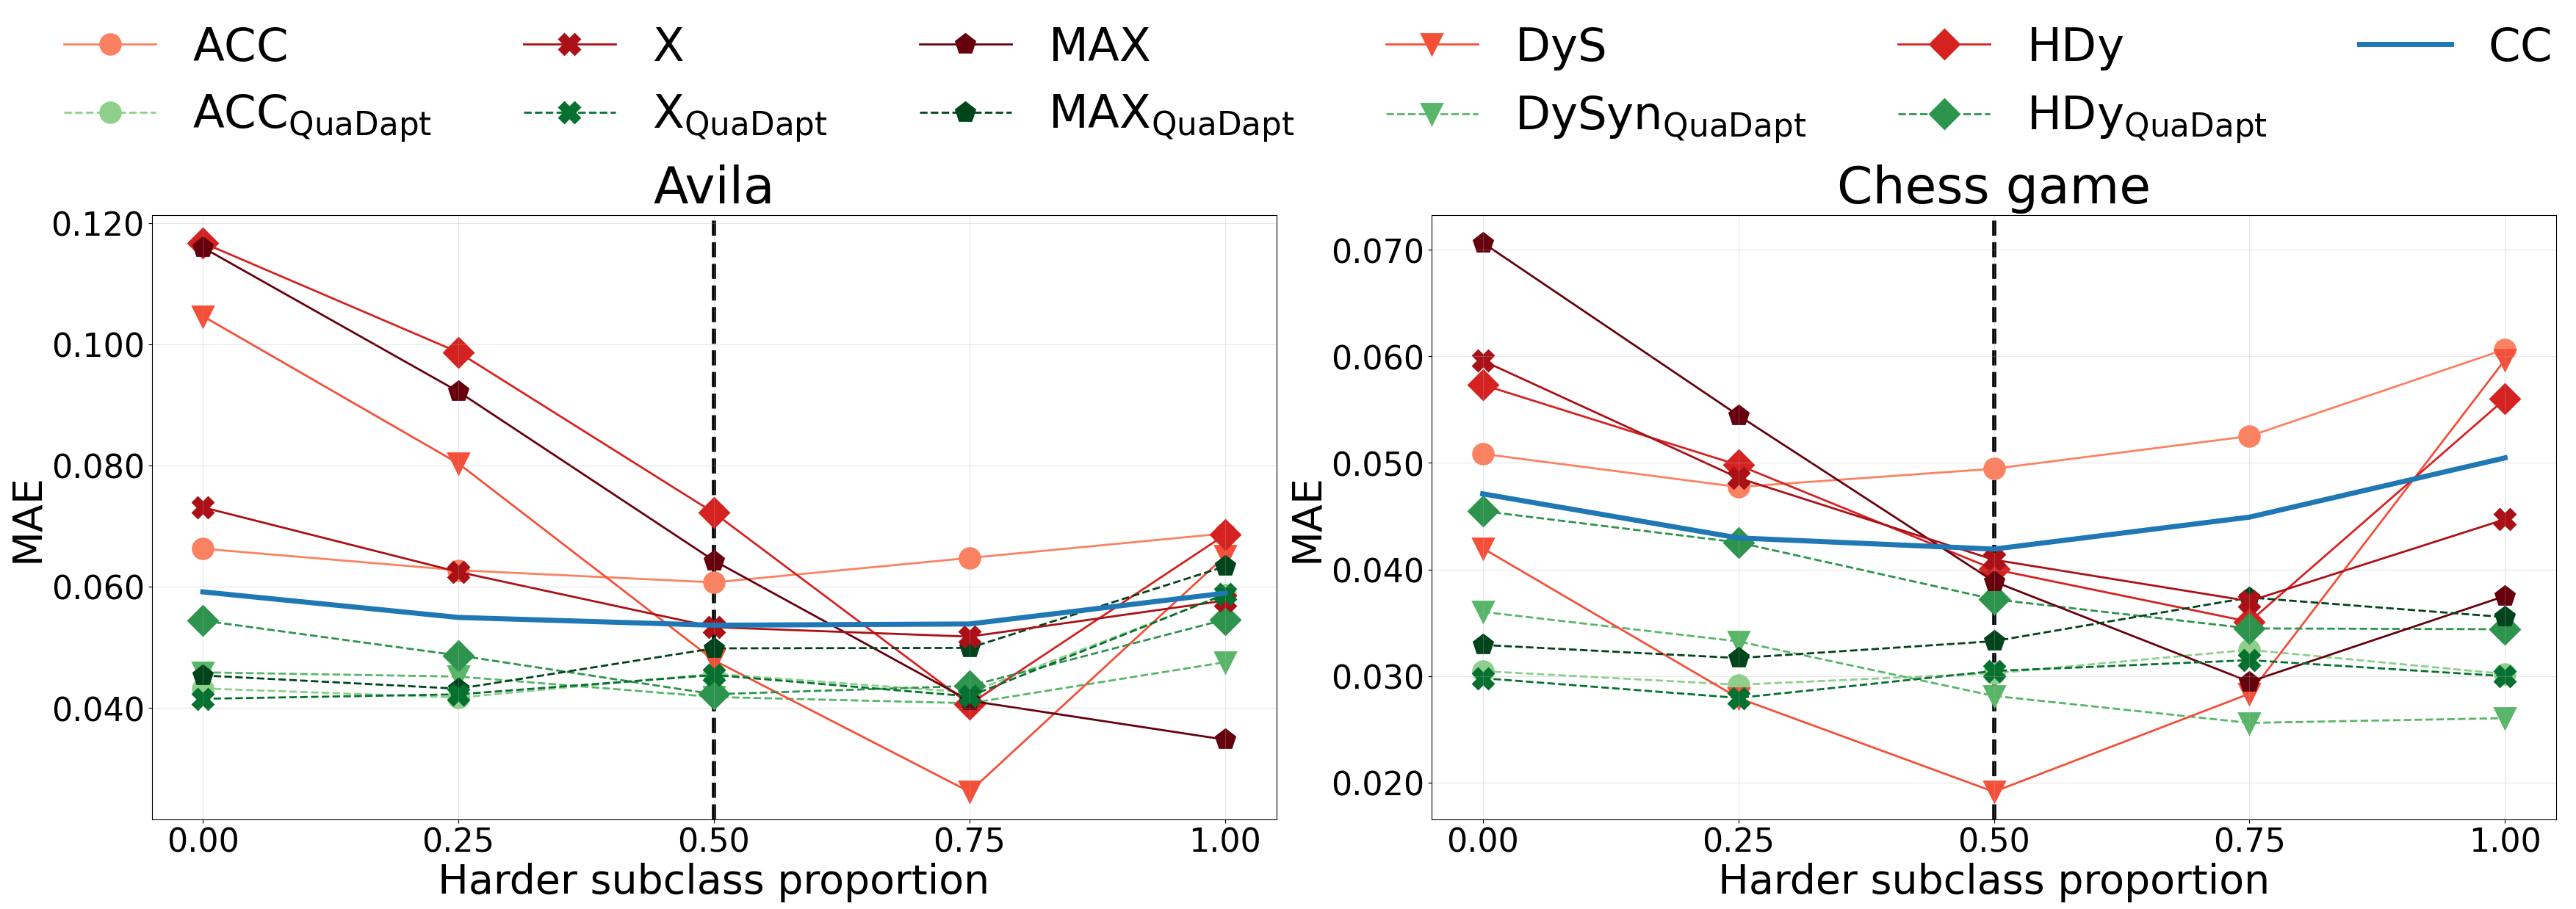

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Define proposal variable
proposal = 'QuaDapt'

# Create double plot for Avila and Chess datasets
datasets_to_plot = ['Avila', 'Chess game']

# Method pairs using proposal variable - REMOVED T50, MS, SMM pairs
method_pairs = [
    ('CC', f'CC{proposal}'),
    ('ACC', f'ACC{proposal}'),
    ('DyS', f'DySyn{proposal}'),
    ('HDy', f'HDy{proposal}'),
    ('X', f'X{proposal}'),
    ('MAX', f'MAX{proposal}'),
]

n_methods = len(method_pairs)
classic_palette = matplotlib.cm.get_cmap('Reds', n_methods + 2)
syn_palette = matplotlib.cm.get_cmap('Greens', n_methods + 2)

# Assign a unique marker for each pair - REMOVED markers for T50, MS, SMM
pair_markers = ['', 'o', 'v', 'D', 'X', 'p', 's']

pair_marker_map = {}
for (classic, syn), marker in zip(method_pairs, pair_markers):
    pair_marker_map[classic] = marker
    pair_marker_map[syn] = marker

# Assign a unique color to each method in the pair
custom_color_map = {}
for idx, (classic_method, syn_method) in enumerate(method_pairs):
    if classic_method == 'CC':
        custom_color_map[classic_method] = 'tab:blue'
    else:
        custom_color_map[classic_method] = classic_palette(idx + 2)
    custom_color_map[syn_method] = syn_palette(idx + 2)

def format_label(name):
    if name.endswith(proposal):
        base = name.replace(proposal, '')
        return fr"$\mathrm{{{base}}}_{{\mathrm{{{proposal}}}}}$"
    else:
        return fr"$\mathrm{{{name}}}$"

# Create figure with subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(35, 11.5))

# Prepare legend handles
legend_handles = []
legend_labels = []

for idx, dataset_name in enumerate(datasets_to_plot):
    ax = axes[idx]
    # Update df_real to use proposal instead of 'Syn'
    df_plot = df_real.copy()
    df_plot['Qnt'] = df_plot['Qnt'].apply(lambda x: x.replace('Syn', proposal) if 'Syn' in x else x)
    
    filtered_data = df_plot[df_plot['dataset'] == dataset_name]
    
    # Group by Qnt and H, calculate mean AE
    grouped_h = filtered_data.groupby(['Qnt', 'H']).agg({'AE': 'mean'}).reset_index()
    
    # Plot each quantifier
    for qnt in grouped_h['Qnt'].unique():

        # Skip PACC methods AND the removed methods
        if qnt in ['PACC', 'PACCQuaDapt', 'T50', 'T50QuaDapt', 'MS', 'MSQuaDapt', 'SMM', 'SMMQuaDapt']:
            continue

        qnt_data = grouped_h[grouped_h['Qnt'] == qnt]

        # Fix the name mapping for special cases
        plot_qnt = qnt
        if qnt == 'DyS-TS':
            plot_qnt = 'DyS'
        elif qnt == 'DyQuaDapt-TS':
            plot_qnt = f'DySyn{proposal}'
        elif qnt == 'HDy-LP':
            plot_qnt = 'HDy'
        
        # Get color and marker from the defined maps
        color = custom_color_map.get(plot_qnt, 'tab:gray')
        marker = pair_marker_map.get(plot_qnt, 'o')
        
        # Determine line style and fill style
        if proposal in plot_qnt:
            linestyle = '--'
            fillstyle = 'none'
        else:
            linestyle = '-'
            fillstyle = 'full'
        
        # Special case for CC (no marker)
        if plot_qnt == 'CC':
            marker = None
            linestyle = '-'
            linewidth = 5
            zorder = 10
        else:
            linewidth = 2
            zorder = 1
        
        line = ax.plot(qnt_data['H'], qnt_data['AE'], 
                  marker=marker, 
                  color=color, 
                  label=format_label(plot_qnt), 
                  markersize=20, 
                  linewidth=linewidth,
                  linestyle=linestyle,
                  markeredgecolor=color, 
                  markeredgewidth=2,
                  zorder=zorder)

        if idx == 0:
            legend_handles.extend(line)
            legend_labels.append(format_label(plot_qnt))
    
    ax.set_title(f'{dataset_name}', fontsize=50, x=0.5, y=1.01)
    ax.set_xlabel('Harder subclass proportion', fontsize=40)
    ax.set_ylabel('MAE', fontsize=40)
    ax.tick_params(axis='x', labelsize=32)
    ax.set_xticks(df_real['H'].unique())
    ax.tick_params(axis='y', labelsize=32)
    if idx == 0:  # First subplot (Avila)
        ax.set_yticks([0.040, 0.060, 0.080, 0.100, 0.120])
    else:  # Second subplot (Chess game)
        ax.set_yticks([0.020, 0.030, 0.040, 0.050, 0.060, 0.070])
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.3f}'))
    ax.grid(True, alpha=0.3)
    ax.axvline(0.5, color='black', linestyle='--', linewidth=4, zorder=0)

# Updated hardcoded legend order - REMOVED T50, MS, SMM methods
hardcoded_ordered_labels = [
    r'$\mathrm{ACC}$',
    r'$\mathrm{ACC}_{\mathrm{QuaDapt}}$',
    r'$\mathrm{X}$',
    r'$\mathrm{X}_{\mathrm{QuaDapt}}$',
    r'$\mathrm{MAX}$',
    r'$\mathrm{MAX}_{\mathrm{QuaDapt}}$',
    r'$\mathrm{DyS}$',  
    r'$\mathrm{DySyn}_{\mathrm{QuaDapt}}$',
    r'$\mathrm{HDy}$',
    r'$\mathrm{HDy}_{\mathrm{QuaDapt}}$',
    r'$\mathrm{CC}$',
]

# You'll need to match these with the corresponding handles
hardcoded_ordered_handles = []
for target_label in hardcoded_ordered_labels:
    for handle, label in zip(legend_handles, legend_labels):
        if label == target_label:
            hardcoded_ordered_handles.append(handle)
            break

# Update legend to use 4 columns instead of 6 (since we have fewer methods)
fig.legend(
    handles=hardcoded_ordered_handles, labels=hardcoded_ordered_labels,
    loc='upper center', bbox_to_anchor=(0.51, 1.1),
    ncol=6, fontsize=45, frameon=False
)

plt.tight_layout(rect=[0, 0, 1, 0.90])
plt.show()